In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import datetime
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import warnings
warnings.filterwarnings('ignore')

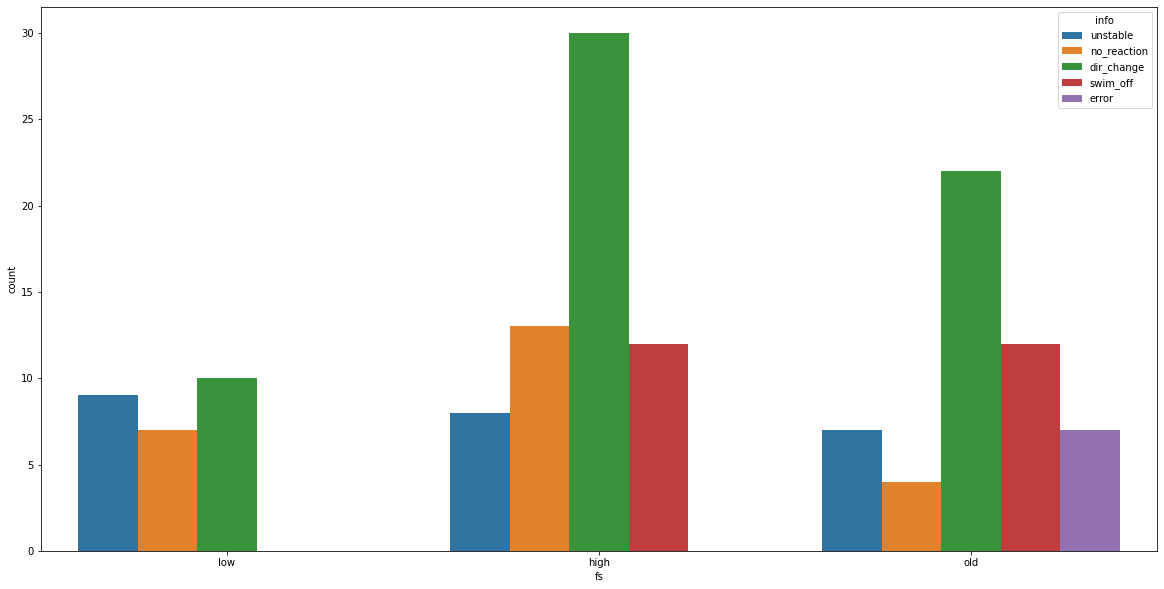

dir_change     62
swim_off       24
no_reaction    24
unstable       24
error           7
Name: info, dtype: int64
dir_change     0.439716
swim_off       0.170213
no_reaction    0.170213
unstable       0.170213
error          0.049645
Name: info, dtype: float64


'\nin 2021, we got farmed in the loch and they were very unstable in prelim tests, not settling. \n We reduced a flow to the minimal (with 5 grids (max)) and did experiments in the nightime.\n It seemed then that we had quite a lot of no-reactions (compared to previous year) so we tried higher flow,\n risking more instability\n High is about 20% faster\n'

In [39]:
finres = pd.read_csv('./input/finresoct.csv')
finres['absstable10']=abs(finres['stable10prev'])
finres['absstable10_v']=abs(finres['stable10prev_v'])

finres['fdistcm'] = 0.6 * finres['fdist']
"""
From farmed indoor in 2019 we didn't have enough data points.
Two pumps in different direction with different flow 
fish in light, as pumps were remotely controlled, 
we were able to take a 10s average at the precise point where fish reacted
"""
sns.countplot(data=finres, x='fs', hue = 'info' )
plt.show()
print(finres['info'].value_counts())
print(finres['info'].value_counts(normalize=True))#check what happened to highold
"""
in 2021, we got farmed in the loch and they were very unstable in prelim tests, not settling. 
 We reduced a flow to the minimal (with 5 grids (max)) and did experiments in the nightime.
 It seemed then that we had quite a lot of no-reactions (compared to previous year) so we tried higher flow,
 risking more instability
 High is about 20% faster
"""
 

In [36]:
finres[finres['fsdir']=='high1']
finres.loc[123]


fishname               wild5
fs                      high
fishdate          03/05/2021
time_flow           15:06:28
time_react          15:06:43
tdiff               00:00:15
info              dir_change
info_other               NaN
direction                  1
stable10prev             NaN
change10                 NaN
stable10after            NaN
fishtype                wild
loc_name               wild5
loc_x               2.733386
loc_y               0.514277
Unnamed: 3               NaN
flocs                    o15
fdist               0.101438
stable10prev_v           NaN
stable10next_v           NaN
change10_v               NaN
change5                  NaN
change5_v                NaN
change1                  NaN
asfractprev5             NaN
asfractprev10            NaN
tsec                    15.0
abs1                     NaN
abs5                     NaN
abs10                    NaN
fsdir                  high1
absstable10              NaN
absstable10_v            NaN
fdistcm       

In [33]:
print(finres['fsdir'].value_counts())



high1     33
high-1    30
old1      27
old-1     25
low1      13
low-1     13
Name: fsdir, dtype: int64


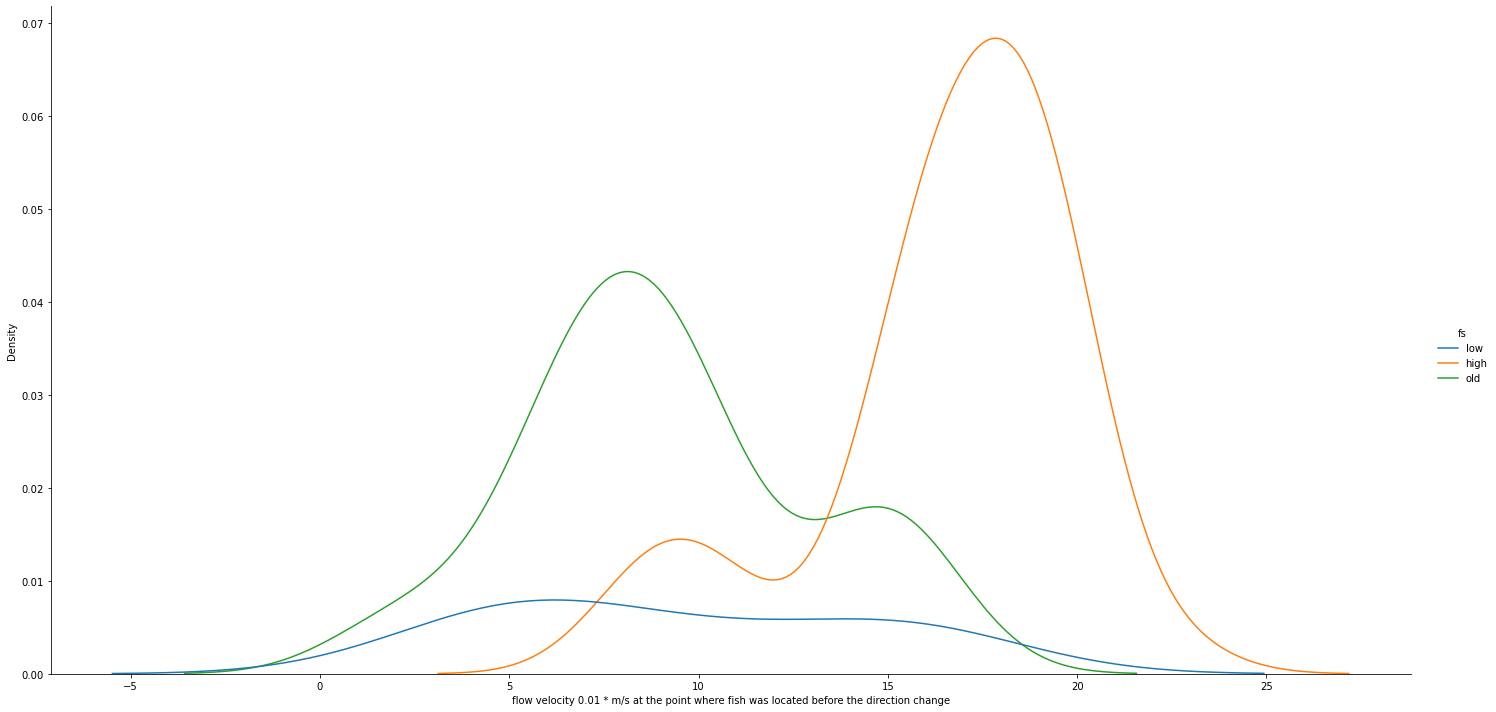

In [40]:
#sns.displot(kind="hist", data=finres, x='absstable10', hue = 'fsdir' ,binwidth=1,kde=True)
#sns.displot(kind="kde", data=finres, x='absstable10', col='fishtype', hue = 'fsdir',height=10, aspect=2,)
sns.displot(kind="kde", data=finres, x='absstable10', hue = 'fs',height=10, aspect=2,)
plt.xlabel('flow velocity 0.01 * m/s at the point where fish was located before the direction change')
plt.show()


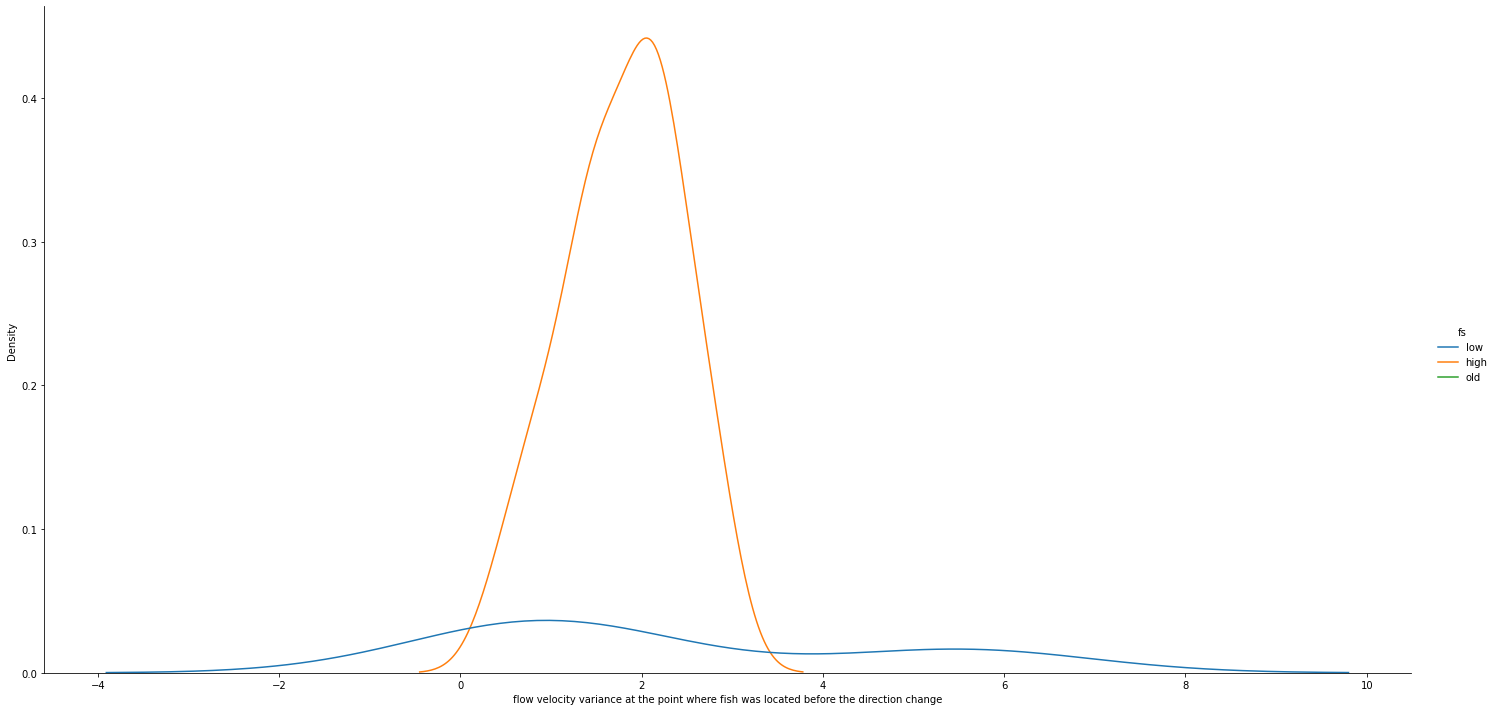

In [41]:
# variance of stable flow
sns.displot(kind="kde", data=finres, x='absstable10_v', hue = 'fs',height=10, aspect=2,)
plt.xlabel('flow velocity variance at the point where fish was located before the direction change')
plt.show()

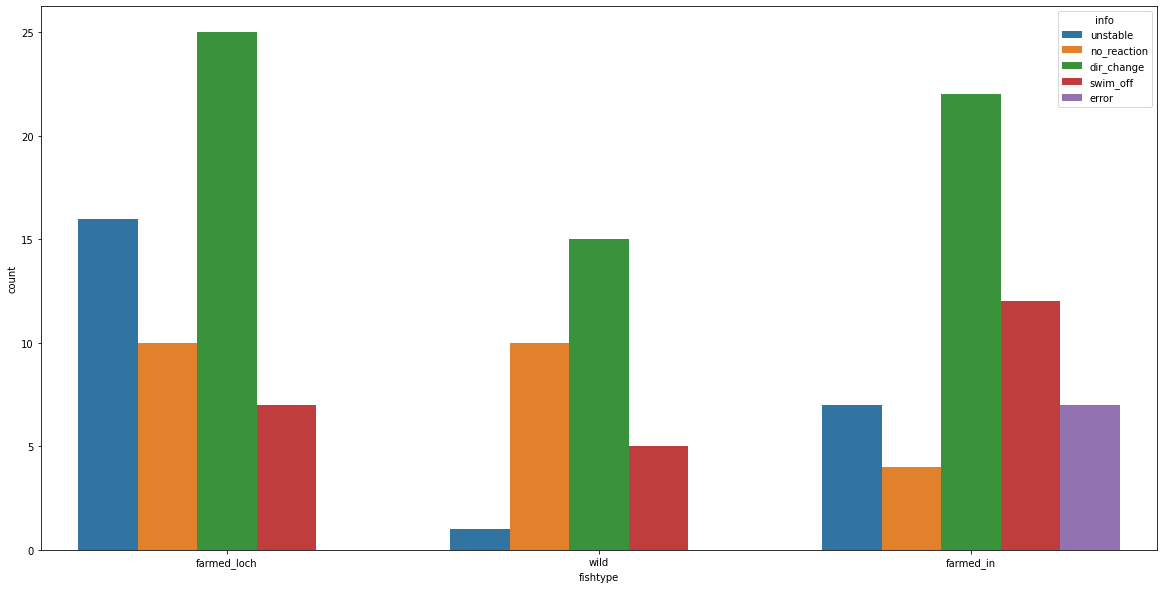

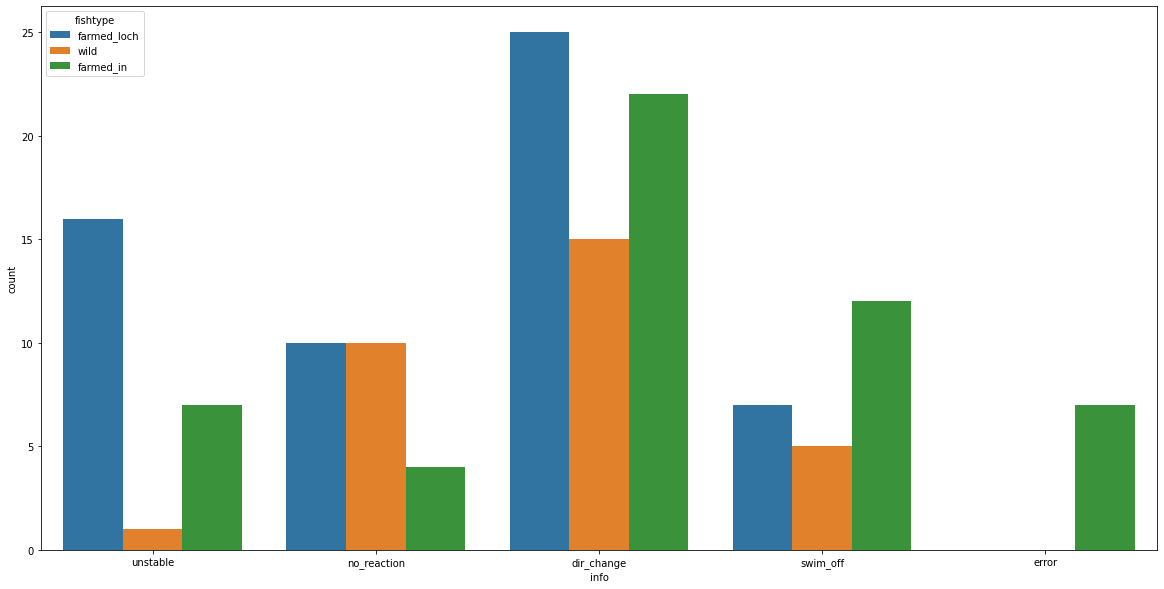

In [42]:
#Reaction of different fish
sns.countplot(data=finres, x='fishtype', hue = 'info')
plt.show()
sns.countplot(data=finres, x='info', hue = 'fishtype')
plt.show()


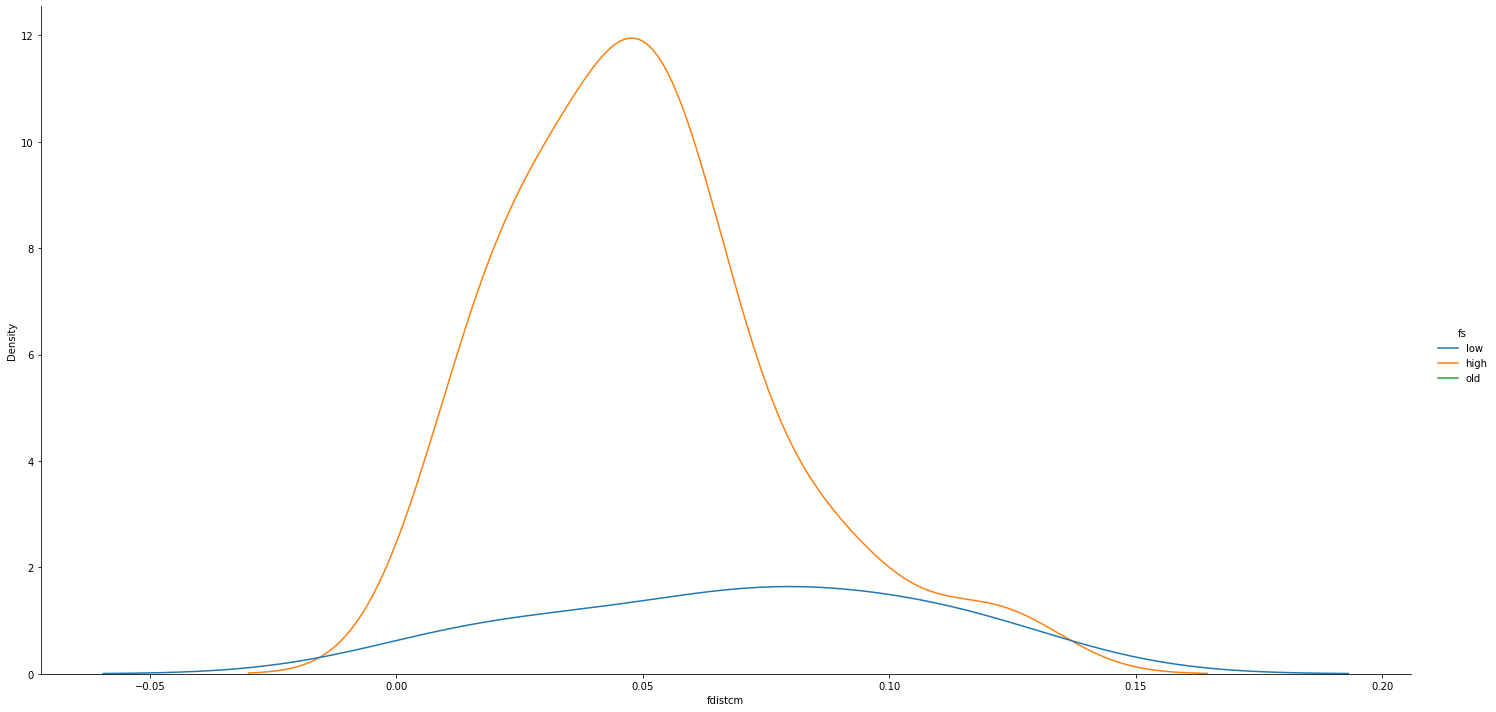

In [43]:
#Because we had a pump switch mechanical in different room there is a change in how we gather flow data.
# I measured flow change in time in many points (or not so many) in the flume. The ull flow profile

sns.displot(kind="kde", data=finres, x='fdistcm', hue = 'fs',height=10, aspect=2,)
plt.show()


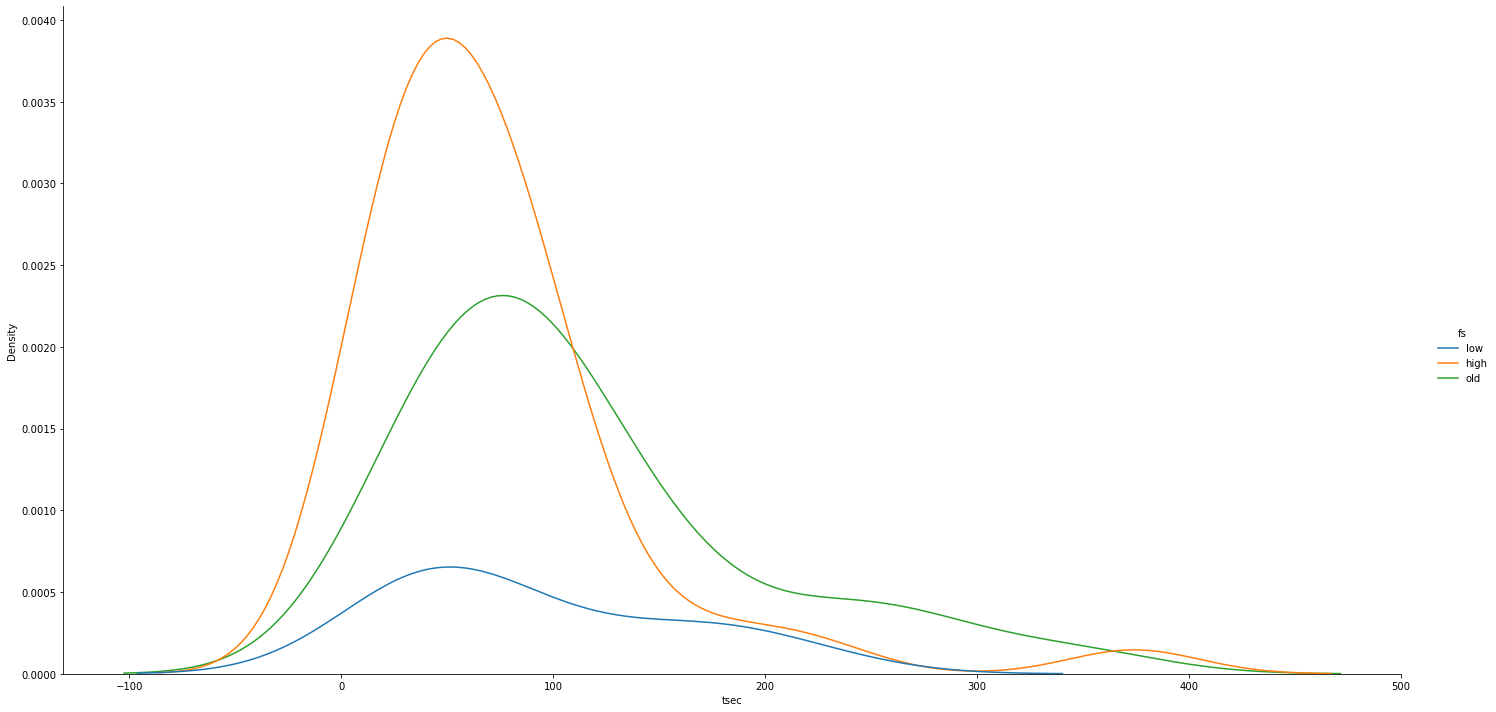

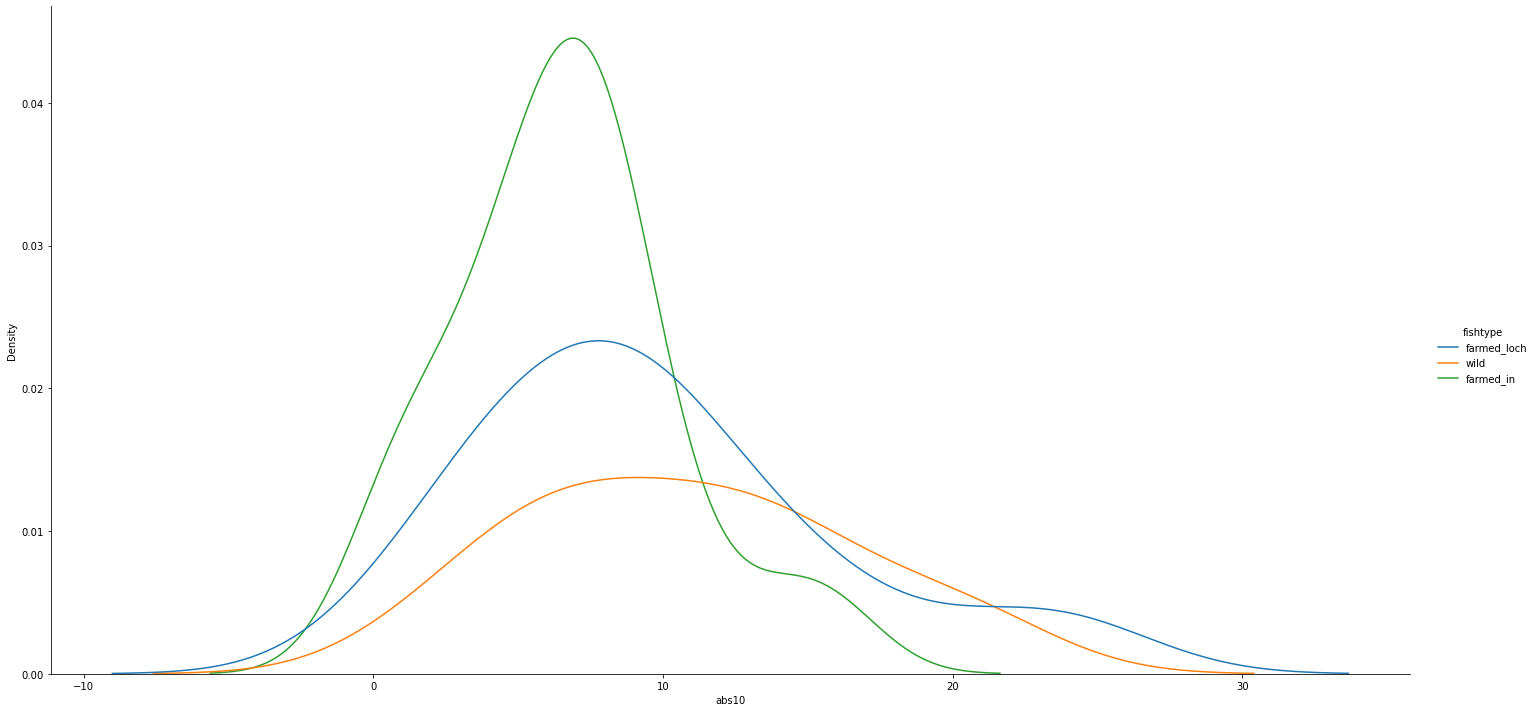

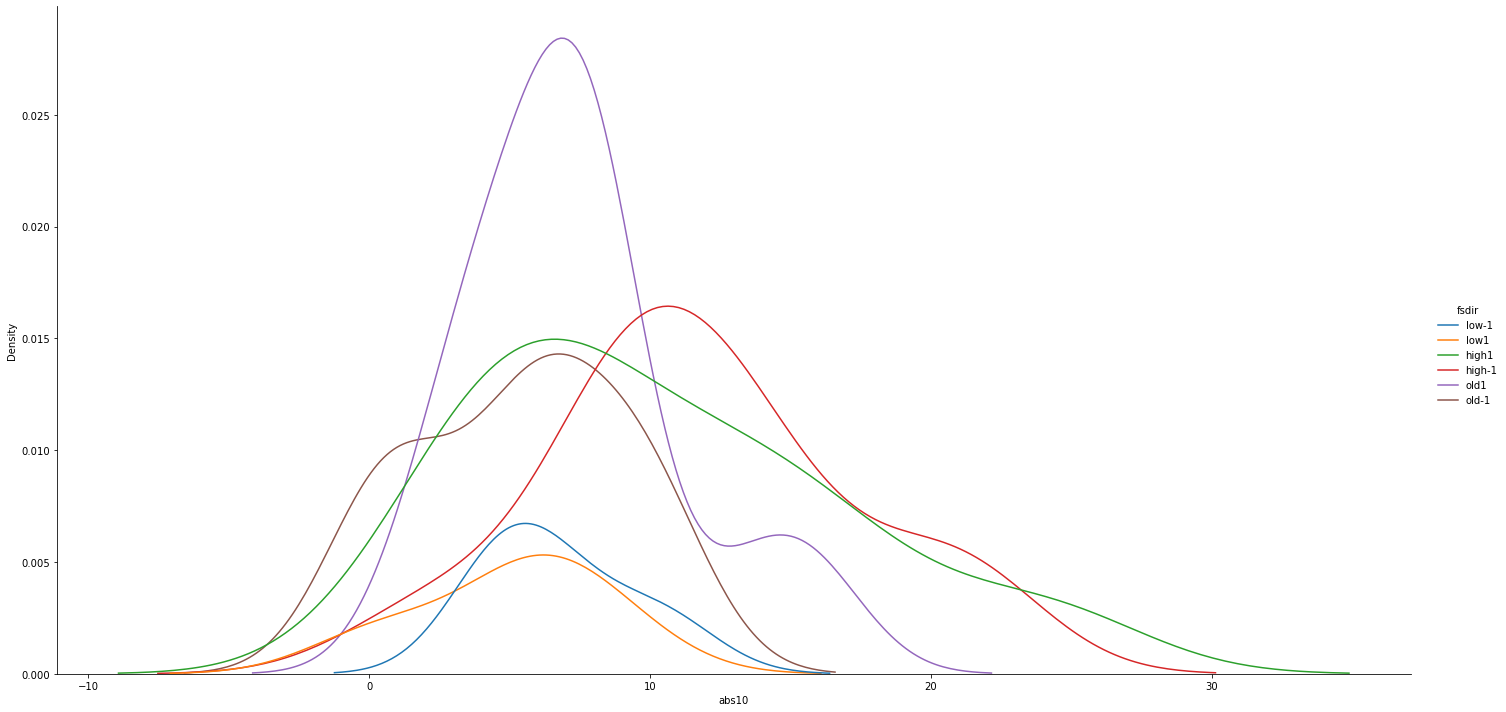

In [44]:
#sns.histplot(data=finres, x='tsec', hue = 'fsdir',binwidth=10,kde=True)

sns.displot(kind="kde", data=finres, x='tsec', hue = 'fs',height=10, aspect=2,)
#sns.displot(kind="kde", data=finres, x='tsec', hue = 'fsdir',height=10, aspect=2,)
plt.show()
sns.displot(kind="kde", data=finres, x='abs10', hue = 'fishtype', height=10, aspect=2,)
plt.show()
sns.displot(kind="kde", data=finres, x='abs10', hue = 'fsdir', height=10, aspect=2,)
plt.show()

In [23]:
#5 second mean value at the turning point
# Is there a difference between value of flow for wild or farmed fish in the same flow conditions?

g1 = finres[(finres['fs']=='high') & (finres['fishtype']=='farmed_loch')]['abs5'].dropna()
g2 = finres[(finres['fs']=='high') & (finres['fishtype']=='wild')]['abs5'].dropna()

print(np.var(g1), np.var(g2))
stats.ttest_ind(a=g1, b=g2, equal_var=True)


49.9191 17.995069252077556


Ttest_indResult(statistic=-0.1100050660764942, pvalue=0.9129998634013771)

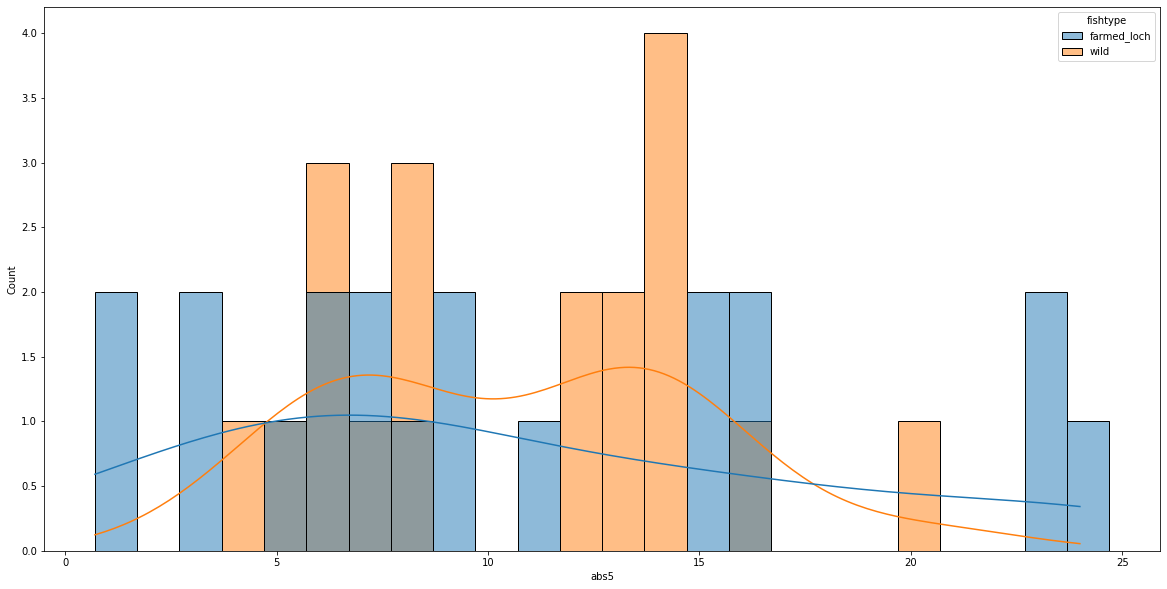

In [24]:
sns.histplot(data=finres[(finres['fs']=='high')], x='abs5', hue = 'fishtype' ,binwidth=1,kde=True)
plt.show()

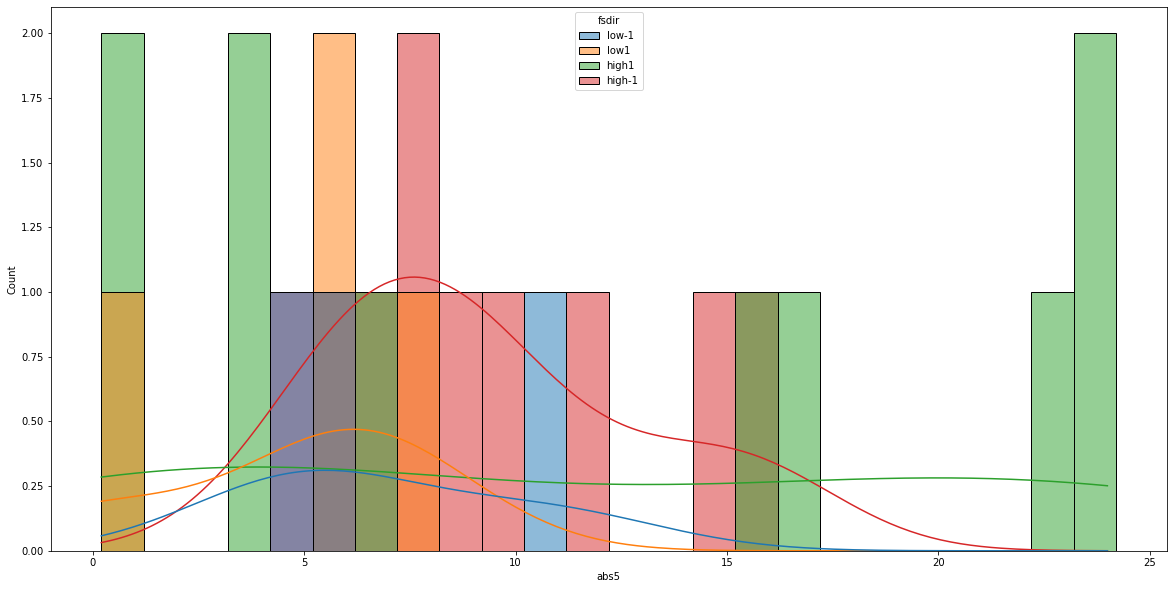

In [25]:
sns.histplot(data=finres[(finres['fishtype']=='farmed_loch')], x='abs5', hue = 'fsdir' ,binwidth=1,kde=True)
plt.show()